In [1]:
# Basic Lib
import numpy as np
import pandas as pd

# visulaization lib
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# #Deep Learning module
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [2]:
#load the dataset
fashion_train = pd.read_csv('fashion-mnist_train.csv')
fashion_test = pd.read_csv('fashion-mnist_test.csv')

In [3]:
# fashion_test

In [4]:
# check the input
fashion_train.shape

(60000, 785)

In [5]:
# split train and test
X_train_fashion =fashion_train.drop('label',axis =1)
Y_train_fashion = fashion_train['label']
X_test_fashion =fashion_test.drop('label',axis =1)
Y_test_fashion = fashion_test['label']

In [6]:
# to check input
# X_train_fashion

In [7]:
# reshapeing to input to see the image value
X_train_reshape = X_train_fashion.values.reshape(-1,28,28) # -1 is for denoting all the images, 28 r,28 c (ie) 28*28 matrix
X_test_reshape = X_test_fashion.values.reshape(-1,28,28)
# X_train_reshape
X_test_reshape

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   4, ...,   0,   0,   0],
        [  0,   0,   1, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

<function matplotlib.pyplot.show(close=None, block=None)>

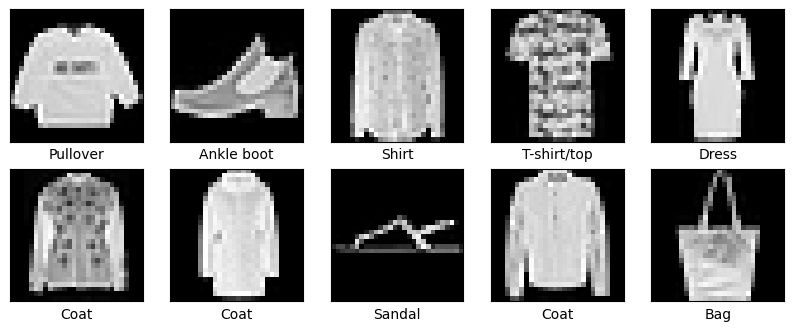

In [8]:
# given col names
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#visualizing the digits

plt.figure(figsize =(10,10)) # to show the size of image l*b
for i in range(10): # range of 10 data 
    plt.subplot(5,5,i+1) # 5,5 show the number of rows and columns to displlay by image, i = 0,1,2,--10 +1 is to increase
    plt.xticks([]) # xaxis
    plt.yticks([]) # y axis
    plt.imshow(X_train_reshape[i],cmap ='gray') # to show the training input, cmap to visualize
    plt.xlabel(col_names[Y_train_fashion[i]]) # to check the training output
plt.show

In [9]:
# to check the output shape
Y_train_fashion.shape # it should be in one hot encoding form

(60000,)

In [10]:
# to perfom one hot encoding
Y_train_fashion = to_categorical(Y_train_fashion, num_classes = 10)# here to categorical is to calssify the 0 to 9 numbers in 10 classes num class shows the number of classes
Y_test_fashion= to_categorical(Y_test_fashion, num_classes = 10)

In [11]:
Y_train_fashion

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [12]:
Y_test_fashion[1]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
# create a model
model = keras.Sequential([
    layers.Dense(128, activation ='relu',input_shape=(784,)),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(24, activation ='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(24, activation ='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(10,activation = 'softmax')
])

C:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# compile
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics =['accuracy'])

In [15]:
history = model.fit(X_train_fashion, Y_train_fashion, batch_size = 100, epochs = 30, validation_data =(X_test_fashion,Y_test_fashion))

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3133 - loss: 1.9399 - val_accuracy: 0.7136 - val_loss: 0.8285
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5530 - loss: 1.2082 - val_accuracy: 0.7570 - val_loss: 0.7043
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6132 - loss: 1.0646 - val_accuracy: 0.7771 - val_loss: 0.6505
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6280 - loss: 1.0242 - val_accuracy: 0.8024 - val_loss: 0.6347
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6480 - loss: 0.9809 - val_accuracy: 0.8124 - val_loss: 0.6379
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6467 - loss: 0.9765 - val_accuracy: 0.8001 - val_loss: 0.6148
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6564 - loss: 0.9560 - val_accuracy: 0.8090 - val_loss: 0.6332
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6553 - loss: 0.9581 - val_accuracy: 0.

In [16]:
test_loss_fashion, test_acc_fashion = model.evaluate(X_test_fashion, Y_test_fashion)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.8429 - loss: 0.5279


In [17]:
print('Fashion MNIST Test accuracy:', round(test_acc_fashion,4))

Fashion MNIST Test accuracy: 0.8436


In [18]:
# model predict
test_pred = model.predict(X_test_fashion)
test_pred = np.argmax(test_pred,axis =1)
Y_test_fashion_eval = np.argmax(Y_test_fashion,axis =1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step


In [19]:
# predicted and actual value output should be same
print("Predicted shape",test_pred.shape)
print("Actual shape", Y_test_fashion_eval.shape)

Predicted shape (10000,)
Actual shape (10000,)


C:\Users\kathi\AppData\Local\Temp\ipykernel_28404\2569081430.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


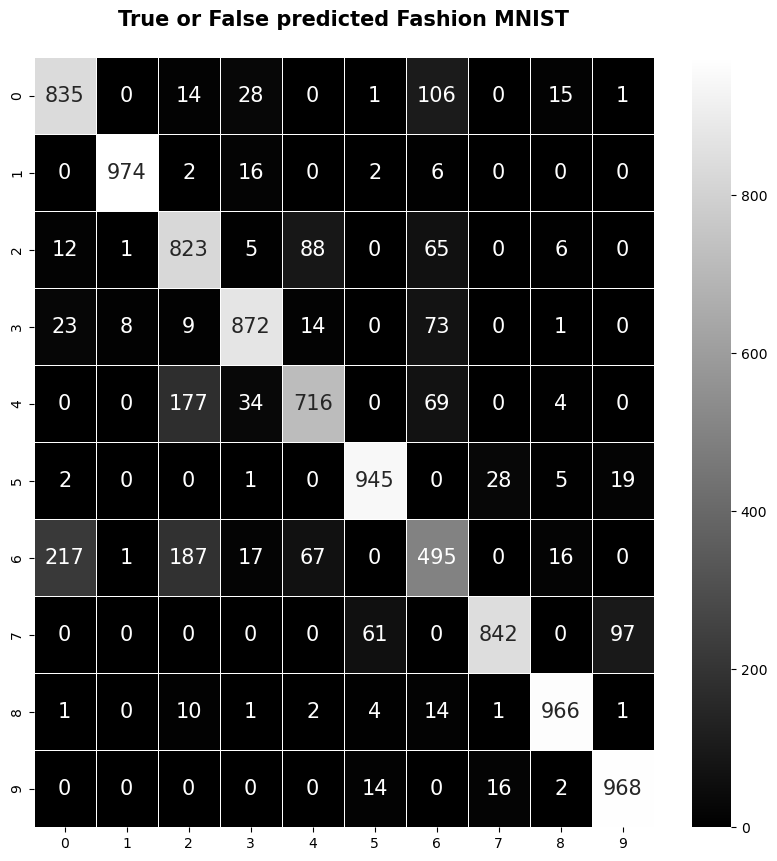

In [20]:
# confusion matrix
con_mat=confusion_matrix(Y_test_fashion_eval,test_pred)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [21]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test_fashion_eval,test_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.99      0.97      0.98      1000
           2       0.67      0.82      0.74      1000
           3       0.90      0.87      0.88      1000
           4       0.81      0.72      0.76      1000
           5       0.92      0.94      0.93      1000
           6       0.60      0.49      0.54      1000
           7       0.95      0.84      0.89      1000
           8       0.95      0.97      0.96      1000
           9       0.89      0.97      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [22]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


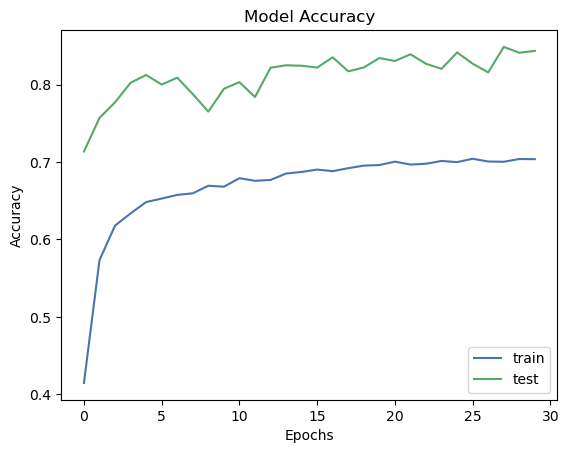

In [23]:
# summarization of accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train','test'])
plt.show()

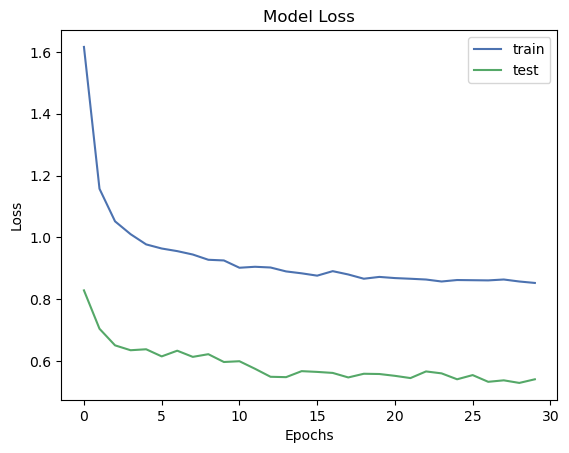

In [24]:
# summarization of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train','test'])
plt.show()

In [25]:
# prediction for one 
test_pred_one = model.predict(X_test_fashion.loc[[0],:].values)
test_pred_one = np.argmax(test_pred_one, axis = 1)
Y_test_fashion_eval = np.argmax(Y_test_fashion,axis =1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


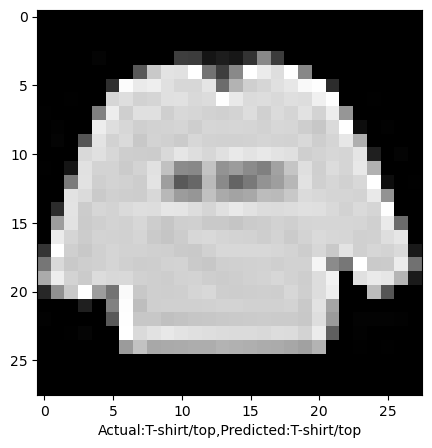

In [26]:
# #Names of clothing accessories in order 

col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

plt.figure(figsize = (5,5))

plt.imshow(X_train_reshape[0],cmap='gray')
plt.xlabel("Actual:{},Predicted:{}".format(col_names[np.argmax(Y_test_fashion[0])],col_names[test_pred_one[0]]))
plt.show()

